###### Cumulative Distribution Functions

**Limits of PMF:**

Probability Mass Function is a *Frequency Function*. Gives probability of Discrete Random Variables.

Random Variable: random outcomes from experiments like rolling dice

Discrete: you can only roll 1,2,3, 6.

PMF will work well if No. of values are small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

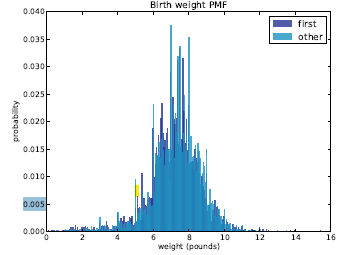

overall this distribution resembles bell shape of normal distribution, with many values near mean and few values much higher and lower.

There are many spikes and valleys, and some apperent differences between distributions. It is hard to see overall patterns. 

These problems can be mitigated by binning the data; that is, dividing the
range of values into non-overlapping intervals and counting the number of
values in each bin. 

Binning can be useful, but it is tricky to get the size of the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.

An alternative that avoids these problems is the cumulative distribution function (CDF), which is the subject of this chapter. But before I can explain CDFs, I have to explain percentiles.

**Percentile:** (Total Number of people behind you/ total number of people) \*100
Suppose I am 4th tallest person in a group of 20 people. My percentile is 16/20 that is 80.
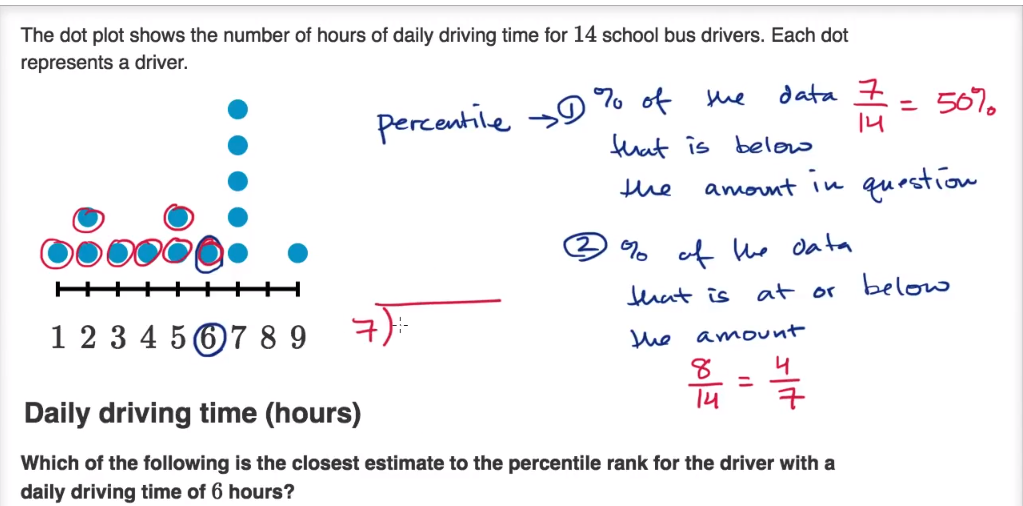


In [1]:
# Percentile Rank

# Percentile rank is fraction of people who scored lower than you. 
# if you were in 90th percentile, you did well as or better than 90% of people who took exam.

# if you were given your score and other's scores this function calculates the percentile rank
def PercentileRank(scores, your_score):
    count=0
    for score in scores:
        if score <= your_score:
            count +=1
    percentile_rank = 100.0*count/len(scores)
    return percentile_rank

scores = [55,66,77,88,99]
PercentileRank(scores,98)


80.0

In [2]:
#PercentileRank takes a value(score) and computer its percentile rank in a set of values(scores)
#Percentile takes a percentile rank and computes the corresponding value(score)

# if you pass scores and your percentile rank it returns your score
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score
Percentile(scores, 80)

88

###### Cumulative Distribution Function (CDF)

In [3]:
# afunction that maps from a value to its percentile rank
# A CDF is a function of x, where x is any value that might appear in the distribution.
# To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution less than or equal to x.

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count+=1
    prob = count/len(sample)
    return prob

# this function is similar to percentile rank, except the result is a probability in range 0-1. rather than percentile rank in range 0-100

EvalCdf([1,2,2,3,5],1.5)

0.2

In [4]:
import first
import thinkstats2
import nsfg
import pandas as pd
import numpy as np
import thinkplot

live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')




<Figure size 640x480 with 1 Axes>

One way to read a CDF is to look up percentiles. For example, it looks like about 10%  of pregnancies are shorter than 36 weeks, and about 90% are shorter than 41 weeks. 

The CDF also provides a visual representation of shape of the distribution. Common values appear as steep or vertical sections of CDF. In this example, the mode at 39 weeks is apparent. There are few values below 30 weeks, so the CDF in this range is flat.

###### Comparing CDFs
CDFs are especially useful for comparing distributions. 

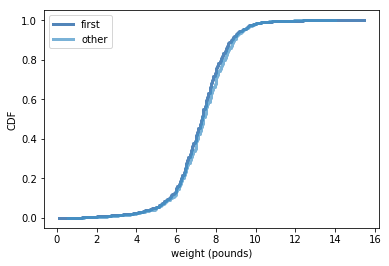

<Figure size 576x432 with 0 Axes>

In [5]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)',ylabel='CDF')

This figure makes the shape of the distributions, and the difference between them, much clearer. We can see that first babies are slightly lighter throughout the distribution, with a larger discrepancy above the mean

###### Percentile Based Statistics

Percentile can be used to compute percentile-based summary statistics. 50th Percentile divides the distribution in half known as **Median.**

Another percentile statistic is Interquartile Range (IQR), which is a mesure of spread of distribution. The IQR is the difference between 75th and 25th percentile.

More generally, percentiles are often used to summerize the shape of a distribution. For example, the distribution of income is often reported in **Quintiles**: that is, it is split at 20th, 40th, 60th and 80th percentiles. 

Other distributions are divided into 10 **Deciles**. 
Equally spaced points in CDF are called **Quantiles**

###### Random Numbers

In [6]:
# we are making CDF of birthweights
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')


In [7]:
# generate sample adn compute the percentile rank of each value in sample.

sample = np.random.choice(weights, 100, replace=True) # gets some samples
ranks = [cdf.PercentileRank(x) for x in sample] # returns the percentile ranks for samples

# sample is random sample of 100 birth weights, chosen with replacement. That means same value could be chosen more than once.
# ranks is a list of percentile ranks.

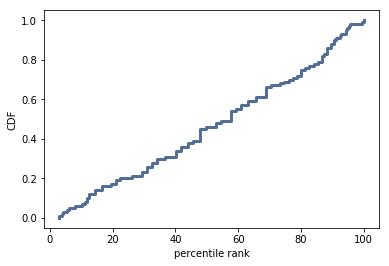

<Figure size 576x432 with 0 Axes>

In [8]:
# plot the CDF of the percentile rank

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

CDF is approximately straight line, which means that the distribution is uniform. 

This figure shows that 10% of the sample is below 10th percentile. 20% of people are below 20th percentile. and so on. 

###### Comparing percentile ranks

Percentile ranks are useful for comparing measurements across different groups.
For example, people who compete in foot races are usually grouped by age and gender. To compare people in different age groups, you can convert race times to percentile ranks.

**EX. by author.**
A few years ago I ran the James Joyce Ramble 10K in Dedham MA; I finished
in 42:44, which was 97th in a field of 1633. I beat or tied 1537 runners out
of 1633, so my percentile rank in the field is 94%.


Glossary

**Percentile Rank:** The percentage of values in distribution that are less than or equal to the given value.

**Percentile:** The value associated with a give percentile rank.

**Cumulative Distribution Function (CDF):** A function that maps from values to their cumulative probabilities. CDF(x) is the fraction of the sample less than or equal to x.

**Inverse CDF:** A function that maps from cumulative probability, p, to the corresponding value.

**Median:** 50th percentile, often used as a measure of central tendency.

**IQR:** The difference between 75th and 25th percentiles, used as measure of spread.

**Quantile:** A sequence of values that correspond to equally spaced percentile ranks. Ex. the quartiles of distribution are on 25th, 50th and 75th percentiles.

**Replacement:** A property of a sampling process. "With replacement", means same value can be chosen more than once. "without replacement" means that once a value is chosen, it is removed from the population.